### Objective:
To develop a predictive regression model that accurately estimates health insurance charges for individuals based on their demographic and health-related attributes.


### Data Dictionary:

**Age**: Age of the individual (in years).

**Sex**: Gender of the individual (Male/Female).
 
**BMI**: Body Mass Index (weight in kg/height in m²).
 
**Number of Children**: Number of dependents covered by insurance.
 
**Smoker**: Smoking status (Yes/No).
 
**Region**: Geographic region (Northeast, Northwest, Southeast, Southwest).
 
**Charges**: Medical insurance costs (e.g., USD).


### Problem Type:
Regression (predicting continuous insurance charges).



#### Algorithms to Consider:

* Linear Regression

* Decision Tree Regressor

* Random Forest Regressor

* Polynomial Regression


### Approach:
##### Data Loading & Initial Checks
* Load the dataset and inspect its structure (using head, info, and describe).

* Check for missing values and handle them (imputation or removal).

* Detect and manage outliers (if any).

##### Exploratory Data Analysis (EDA)
* Analyze distributions of numerical (Age, BMI, Charges) and categorical (Sex, Smoker, Region) features.

##### Data Preprocessing
* Encode Categorical Variables using the Label Encoder

##### Library Used
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scikit-Learn

##### Feature Scaling:
* Standardize/Normalize numerical features (Age, BMI, Number of Children) if needed.
* Train-Test Split:
* Divide data into training (70-80%) and testing (20-30%) sets.

##### Model Training
1. Train multiple regression models (Linear Regression, Random Forest, etc.).
2. Evaluate models using:
   - R² Score (primary metric)
   - Mean Absolute Error (MAE)
   - Mean Squared Error (MSE)
   - Root Mean Squared Error (RMSE)

##### Model Evaluation & Selection
* Compare model performance on the test set.
* Select the best-performing model based on evaluation metrics.
* Check the model accuracy by comparing the train data with the test data


In [1]:
# Importing the necessary Python libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the warnings library to manage warning messages

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the insurance dataset from a CSV file into a pandas DataFrame
Insurance_dataset = pd.read_csv('insurance.csv')

In [4]:
# Displaying the contents of the Insurance_dataset DataFrame
Insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##### From the information above, we can see that the dataset consists of
- 7 columns
- 1338 rows
- 3 different datatypes (integers, floats and strings)


### Exploratory Data Analysis

In [5]:
# Displaying a summary of the dataset
Insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Checking for missing (null) values in each column of the dataset
Insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###### There are no null value in the dataset.

In [7]:
# Extracting all unique values from the 'region' column of the dataset
Region_List = Insurance_dataset['region'].unique()

# Printing a message to indicate the start of the region list
print("Unique region in this dataset are:")

# Looping through the list of unique regions and printing each one
for Region in Region_List:
    print(Region)

Unique region in this dataset are:
southwest
southeast
northwest
northeast


In [8]:
# Creating an empty list to store age group labels
age_group = []

# Looping through each age value in the 'age' column
for age in Insurance_dataset['age']:
    if age < 25:
        age_group.append('18-25')
    elif age < 35:
        age_group.append('26-35')
    elif age < 30:
        age_group,append('36-50')
    else:
        age_group.append('51-64')

# Assigning the final list of age groups as a new column in the DataFrame
Insurance_dataset['age_group'] = age_group

In [9]:
# Checking to see if the change was successful
Insurance_dataset

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,18-25
1,18,male,33.770,1,no,southeast,1725.55230,18-25
2,28,male,33.000,3,no,southeast,4449.46200,26-35
3,33,male,22.705,0,no,northwest,21984.47061,26-35
4,32,male,28.880,0,no,northwest,3866.85520,26-35
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,51-64
1334,18,female,31.920,0,no,northeast,2205.98080,18-25
1335,18,female,36.850,0,no,southeast,1629.83350,18-25
1336,21,female,25.800,0,no,southwest,2007.94500,18-25


In [10]:
# Generating descriptive statistics for the numerical columns in the dataset
Insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Data Visualization

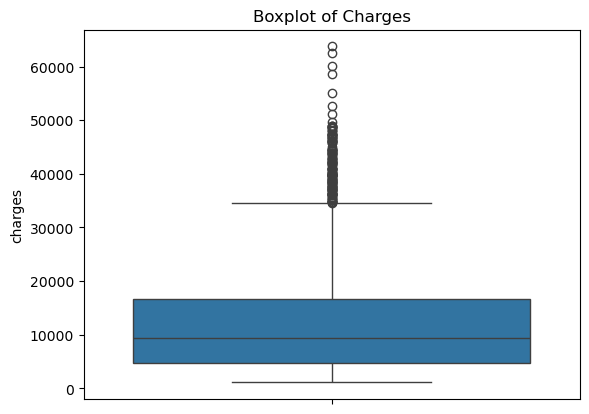

In [11]:
# Creating a boxplot to visualize the distribution of insurance charges
sns.boxplot(Insurance_dataset['charges'])
plt.title('Boxplot of Charges')
plt.show()

Text(0.5, 1.0, 'Boxplot of Age')

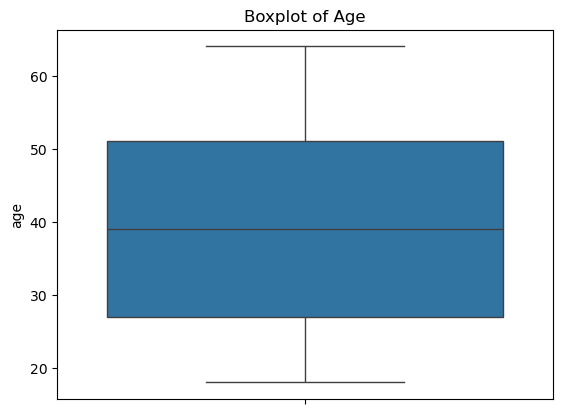

In [12]:
# Creating a boxplot to visualize the distribution of the 'age' variable in the dataset
sns.boxplot(Insurance_dataset['age'])
plt.title('Boxplot of Age')


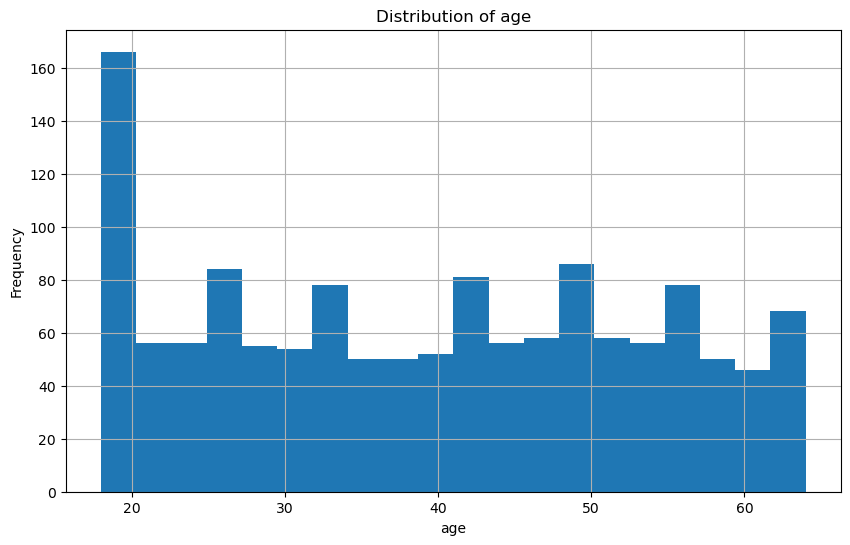

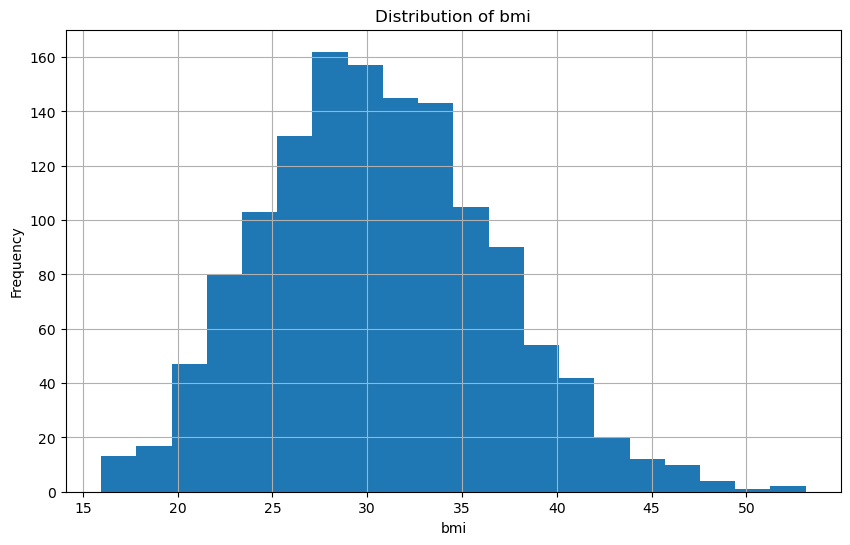

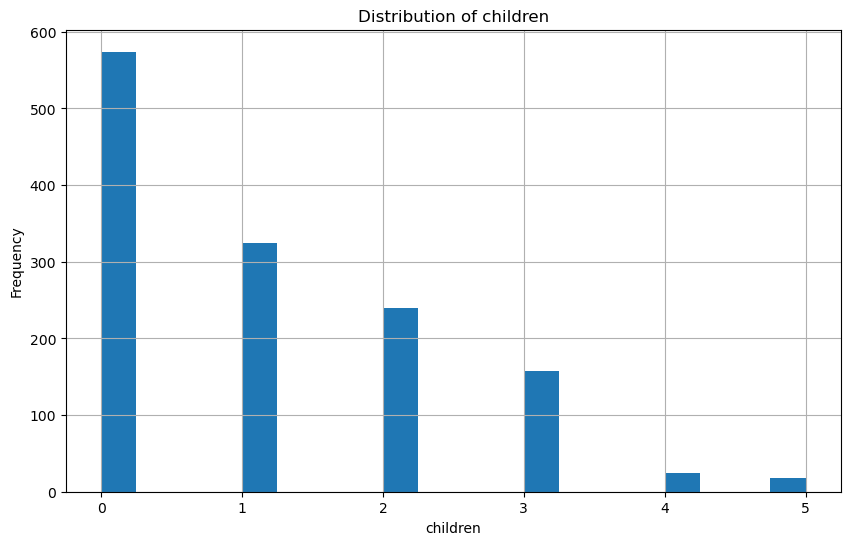

In [13]:
# Defining a list of numerical features we want to visualize
num_features = ['age', 'bmi', 'children']

# Looping through each numerical feature in the list and a creating a histogram for each of them
for feature in num_features:
    plt.figure(figsize =(10,6))
    Insurance_dataset[feature].hist(bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)     
    plt.ylabel('Frequency') 
    plt.show()

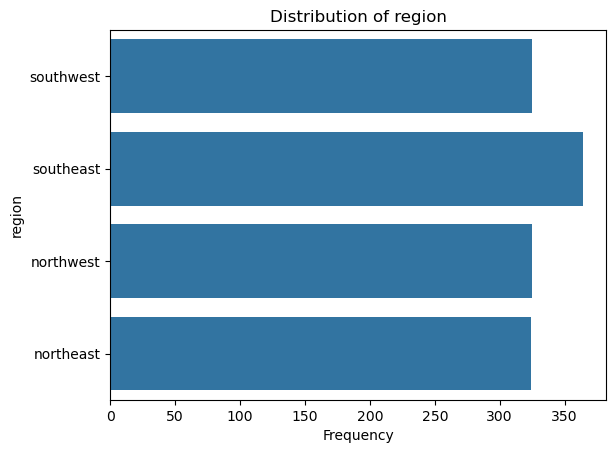

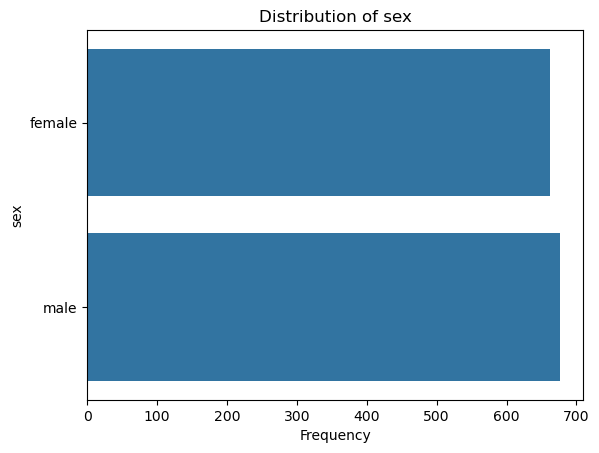

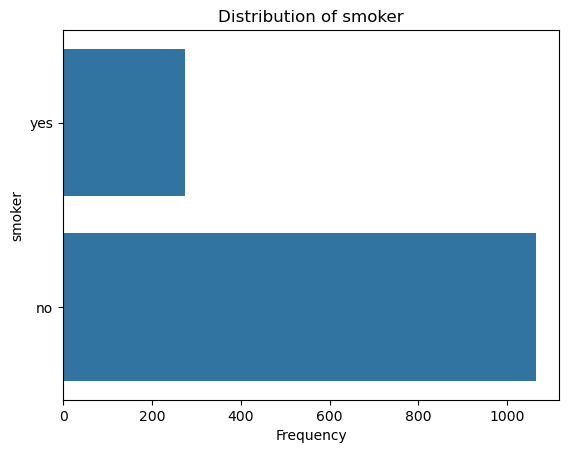

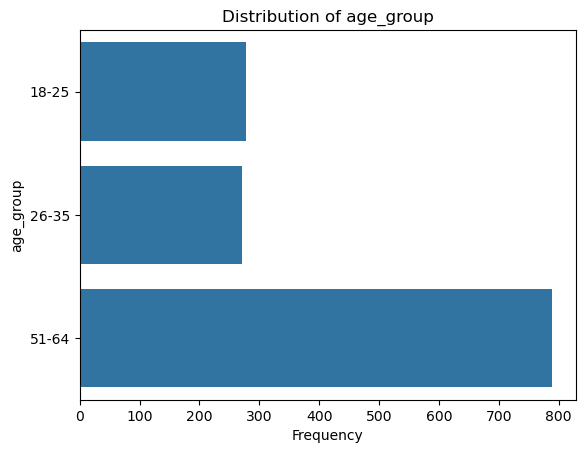

In [14]:
# Creating a list of categorical features in the dataset
categorical_features = ['region', 'sex', 'smoker', 'age_group']

# Looping through each categorical feature to visualize their distribution
for features in categorical_features:
    sns.countplot(Insurance_dataset[features])
    plt.title(f'Distribution of {features}')
    plt.xlabel('Frequency')                      
    plt.ylabel(features) 
    plt.show()

### Encoding Categorical Variables 

In [15]:
# Importing the LabelEncoder from scikit-learn to convert categorical values into numerical values.
from sklearn.preprocessing import LabelEncoder

In [16]:
# Creating an instance of the LabelEncoder class
LabelEncoder = LabelEncoder()

In [17]:
# Selecting all categorical features (columns with data type 'object') from the dataset
categorical_features = Insurance_dataset.select_dtypes(include = 'object')

In [18]:
# Looping through each categorical column in the dataset and applying Label Encoding to convert text categories into numeric labels
for feature in categorical_features.columns:
    Insurance_dataset[feature] = LabelEncoder.fit_transform(Insurance_dataset[feature])

In [19]:
Insurance_dataset

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,0,27.900,0,1,3,16884.92400,0
1,18,1,33.770,1,0,2,1725.55230,0
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,1
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,2
1334,18,0,31.920,0,0,0,2205.98080,0
1335,18,0,36.850,0,0,2,1629.83350,0
1336,21,0,25.800,0,0,3,2007.94500,0


In [20]:
# Computing the correlation matrix for the numerical features in the dataset
Insurance_dataset.corr()

,age,sex,bmi,children,smoker,region,charges,age_group
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.869149
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,-0.016988
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.077402
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,0.171721
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,-0.015244
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,-0.001274
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.241600
age_group,0.869149,-0.016988,0.077402,0.171721,-0.015244,-0.001274,0.241600,1.000000


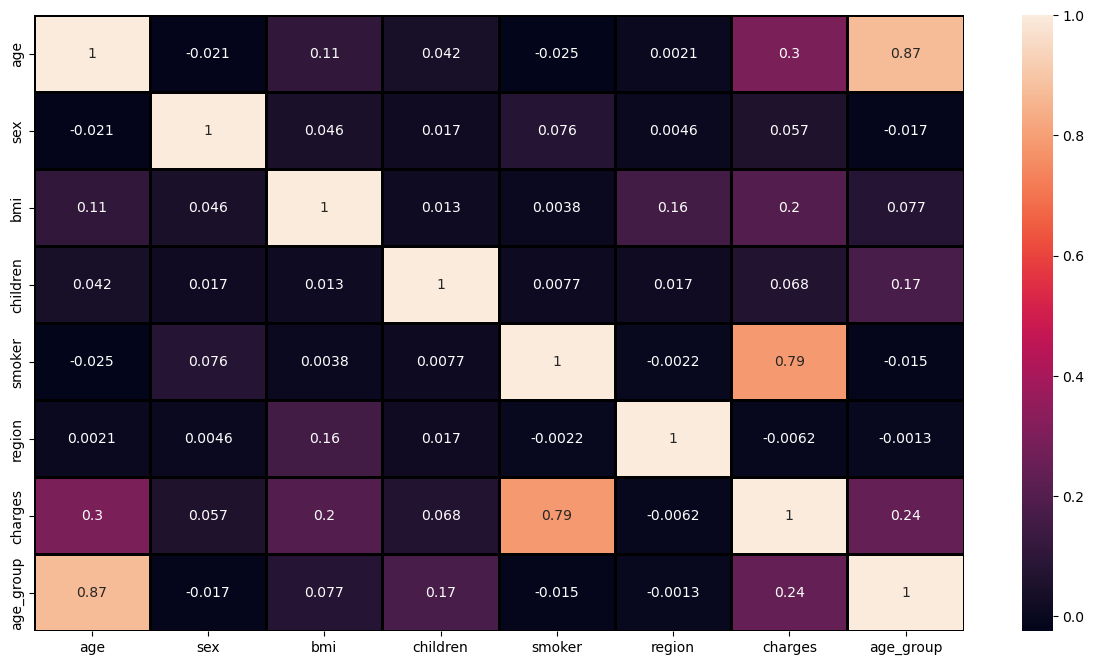

In [21]:
# Creating a heatmap to visualize the correlation matrix of the dataset
plt.figure(figsize = (15,8))
sns.heatmap(Insurance_dataset.corr(), annot = True, linewidths = 2, linecolor = 'black')
plt.show()

### Feature Selection Using Select KBest

In [22]:
# Defining the feature and target variables for the model
Features = Insurance_dataset.drop(['charges', 'age_group'], axis =1)
y = Insurance_dataset['charges']

In [23]:
# Importing SelectKBest and f_classif from scikit-learn
from sklearn.feature_selection import SelectKBest, f_classif

In [24]:
# Creating a SelectKBest object to select the top 4 features based on their statistical relationship with the target
kbest = SelectKBest(score_func = f_classif, k=4)

In [25]:
# Applying the SelectKBest feature selection to the dataset
kbest.fit_transform(Features,y)

array([[27.9 ,  0.  ,  1.  ,  3.  ],
       [33.77,  1.  ,  0.  ,  2.  ],
       [33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [36.85,  0.  ,  0.  ,  2.  ],
       [25.8 ,  0.  ,  0.  ,  3.  ],
       [29.07,  0.  ,  1.  ,  1.  ]])

In [26]:
# Calling out the column names selected by SelectKBest (feature selection)

# Get the indices of the top selected features (those with the highest scores)
feat_indices = kbest.get_support(indices = True)

# Use those indices to retrieve the actual column names from the original feature set
feat_names = Features.columns[feat_indices]

# Display the names of the selected features
feat_names

Index(['bmi', 'children', 'smoker', 'region'], dtype='object')

In [27]:
# Selecting a subset of features from the dataset to use as predictors:

X = Insurance_dataset[['bmi', 'children', 'smoker', 'region']]

### Feature Splitting

In [28]:
# Importing the train_test_split to split the features into training and testing subsets 

from sklearn.model_selection import train_test_split

In [29]:
# Splitting the dataset into training and testing sets.
# - X: feature variables (independent variables)
# - y: target variable (dependent variable, in this case: 'charges')
# - test_size=0.2: 20% of the data will be used for testing, 80% for training
# - random_state=42: ensures reproducibility (same split every time you run the code)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Algorithm

In [30]:
# Importing the LinearRegression class from scikit-learn's linear_model module
from sklearn.linear_model import LinearRegression

In [31]:
# Creating an instance of the LinearRegression model
linear_model = LinearRegression()

In [32]:
# Fitting the linear regression model to the training data
lr_model = linear_model.fit(X_train, y_train)

In [33]:
# Using the trained linear regression model to make predictions on the test data
predictions = lr_model.predict(X_test)

# Displaying the predicted insurance charges
predictions

array([ 7346.71197651,  7823.67017872, 29725.13120035,  7916.31545589,
       31772.76477967, 13126.89912632,  4771.53710766, 11030.34163312,
        2919.23912891,  9113.98792681, 30000.5240146 ,  9276.27914693,
        7986.59370193, 37573.03402009, 35160.27959297, 35575.85467295,
       13920.4350248 , 34026.0232776 ,  7360.30656943, 29725.13120035,
        7841.58274549,  9548.49627437,  7432.99897759, 12075.63834208,
        8882.18035179,  9178.04365436,  9344.39477159,  9809.41065186,
        7926.23091405,  7599.86698122,  9427.25381221,  8557.7274996 ,
        9523.46317391,  5559.60510989,  7880.72769172, 12075.63834208,
        6416.67984951,  7840.05969611, 29215.12861771, 33444.47094027,
        9752.97853949,  8974.95521702, 10239.47143751,  5969.20957858,
       11102.14292854,  6864.0278013 , 10512.58621369,  6783.45333476,
       34978.41589972, 12175.77801283, 10105.01551123,  7897.12411157,
       13070.22237566,  6512.25654167,  9344.52399319, 10167.03747255,
      

In [34]:
# Importing common evaluation metrics for regression models from scikit-learn:
# - mean_absolute_error: average absolute difference between predicted and actual values
# - mean_squared_error: average of squared differences (penalizes larger errors more)
# - r2_score: measures how well the model explains the variance in the target (1.0 = perfect fit)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
# Calculating the Mean Absolute Error
MAE = mean_absolute_error(y_test, predictions)

print(f' The Mean Absolute Error is {MAE}')

 The Mean Absolute Error is 5461.086611928256


In [36]:
# Calculating the Mean Squared Error
MSE = mean_squared_error(y_test, predictions)

print(f' The Mean Squared Error is {MSE}')

 The Mean Squared Error is 47011469.76265279


In [37]:
# Calculating the Root Mean Squared Error
RMSE = np.sqrt(MSE)

print(f' The Root Mean Squared Error is {RMSE}')

 The Root Mean Squared Error is 6856.491067787721


In [38]:
# Calculating the R² score (coefficient of determination) to evaluate the model's performance
R2_score = r2_score(y_test, predictions)

print(f' The R2 score is {R2_score}')

 The R2 score is 0.6971861263475515


#### Checking The Linear Regression Model's Accuracy

In [39]:
# Making predictions on the training data using the trained Linear Regression model to see how well the model fits the training data
predictions_train = lr_model.predict(X_train)

In [40]:
# Calculating the R² score (coefficient of determination) to evaluate the model's performance
R2_score_train = r2_score(y_train, predictions_train)

print(f' The R2 score is {R2_score_train}')

 The R2 score is 0.652964124762761


#### Findings
* The R² score of the Test data is **0.6971861263475515**
* The R² score of the Train data is **0.652964124762761**

The Test R² is higher than the Train R², which is unusual but not necessarily bad. It might be due to:
* Slight randomness in the data split
* Some variance in the test set is easier to predict

##### There's no clear sign of overfitting or underfitting — the model is reasonably balanced.

### Decision Tree Regressor

In [41]:
# Importing the DecisionTreeRegressor from scikit-learn
from sklearn.tree import DecisionTreeRegressor

In [42]:
# Create an instance of the DecisionTreeRegressor model for regression tasks
DTR_model = DecisionTreeRegressor()

In [43]:
# Fitting the Decision Tree Regressor model using the training data (features and target)
model_2 = DTR_model.fit(X_train, y_train)

In [44]:
# Using the trained Decision Tree model to make predictions on the test data
predictions_2 = model_2.predict(X_test)

# Displaying the predicted insurance charges
predictions_2

array([23241.47453 , 18914.289155, 28950.4692  ,  5312.16985 ,
       45710.20785 ,  3410.324   ,  2402.6434  ,  7669.0994  ,
        1694.7964  , 14394.39815 , 25382.297   , 24059.68019 ,
        4562.8421  , 43753.33705 , 38126.2465  , 40932.4295  ,
        5124.1887  , 42760.5022  ,  6770.1925  , 28950.4692  ,
        3847.674   ,  7954.517   ,  8116.68    ,  6362.3398  ,
       10702.6424  , 10435.06525 ,  7348.142   ,  6077.6219  ,
        4435.0942  ,  2897.4037  ,  6059.173   ,  2261.5688  ,
        2020.177   ,  8605.3615  , 10214.636   ,  6362.3398  ,
        5472.449   , 10214.636   , 15817.9857  , 44423.803   ,
       11253.421   ,  9290.1395  , 27724.28875 ,  1708.0014  ,
        7160.094   ,  6315.423   , 12269.68865 ,  5708.867   ,
       37465.34375 ,  8347.1643  , 12567.404815,  3392.3652  ,
        7650.77375 ,  5227.98875 ,  1137.4697  ,  4678.4159  ,
        1708.0014  , 60021.39897 , 10369.42    ,  9722.7695  ,
        8018.2795  ,  5846.9176  , 10381.4787  , 30284.

In [45]:
# Calculating the Mean Absolute Error
MAE_2 = mean_absolute_error(y_test, predictions_2)

print(f' The Mean Absolute Error is {MAE_2}')

 The Mean Absolute Error is 6117.577331309702


In [46]:
# Calculating the Mean Squared Error
MSE_2 = mean_squared_error(y_test, predictions_2)

print(f' The Mean Squared Error is {MSE_2}')

 The Mean Squared Error is 70493886.03919892


In [47]:
# Calculating the Root Mean Squared Error
RMSE_2 = np.sqrt(MSE_2)

print(f' The Root Mean Squared Error is {RMSE_2}')

 The Root Mean Squared Error is 8396.063722912


In [48]:
# Calculating the R² score (coefficient of determination) to evaluate the model's performance
R2_score_2 = r2_score(y_test, predictions_2)

print(f' The R2 score is {R2_score_2}')

 The R2 score is 0.5459293911014382


#### Checking The Decision Tree Regressor Model's Accuracy

In [49]:
# Making predictions on the training data using the trained Decision Tree Regressor model to see how well the model fits the training data
predictions_train_2 = lr_model.predict(X_train)

In [50]:
# Calculating the R² score (coefficient of determination) to evaluate the model's performance
R2_score_train_2 = r2_score(y_train, predictions_train_2)

print(f' The R2 score is {R2_score_train_2}')

 The R2 score is 0.652964124762761


#### Findings
* The R² score of the Test data is **0.5566717508974519**
* The R² score of the Train data is **0.652964124762761**

The train score is higher than the test score, which is a typical sign of mild underfitting.

The model does better on the training data than on unseen data, which is common with decision trees when:
* The tree is too deep (complex)
* There's not enough regularization

### Random Forest Regressor

In [51]:
# Importing the RandomForestRegressor from scikit-learn's ensemble module
from sklearn.ensemble import RandomForestRegressor

In [52]:
# Creating an instance of the RandomForestRegressor model with default parameters
RFR_model = RandomForestRegressor()

In [53]:
# Fitting the Random Forest Regressor model on the training data
model_3 = RFR_model.fit(X_train, y_train)

In [54]:
# Using the trained Random Forest Regressor model to make predictions on the test set
predictions_3 = RFR_model.predict(X_test)

# Displaying the predicted insurance charges
predictions_3

array([18020.16890197, 17740.069433  , 26140.755953  ,  8082.5570711 ,
       41709.1384125 ,  7906.3255614 ,  4143.7384593 ,  6238.45595975,
        5742.8649019 ,  8412.6810693 , 21319.7439977 , 19964.69723087,
        5087.18560575, 44943.709357  , 41328.5560961 , 40517.91879385,
        6174.9614474 , 43089.1215236 ,  7361.7508805 , 26140.755953  ,
        6755.8284012 , 10087.0678126 ,  8246.9071195 ,  6641.62344275,
       11667.5649989 ,  9716.6023899 ,  4220.3703135 ,  7545.8250274 ,
        8930.347971  ,  8109.18443407,  6506.669664  ,  7165.8275185 ,
        5309.0539085 ,  7105.5095655 ,  7607.16239967,  6641.62344275,
        8991.7217717 ,  7656.15563517, 18881.9957599 , 41593.4937    ,
        9714.738504  ,  8289.3221174 ,  8585.300636  ,  5128.69230602,
        9922.3396961 ,  6661.31646486, 12900.3857729 ,  6743.7550966 ,
       42403.9485465 ,  9117.11888863, 11348.05375815,  4152.9424275 ,
        7362.8618121 ,  4807.48341336,  2453.760457  , 12248.15849899,
      

In [55]:
# Calculating the Mean Absolute Error
MAE_3 = mean_absolute_error(y_test, predictions_3)

print(f' The Mean Absolute Error is {MAE_3}')

 The Mean Absolute Error is 4903.852728440218


In [56]:
# Calculating the Mean Squared Error
MSE_3 = mean_squared_error(y_test, predictions_3)

print(f' The Mean Squared Error is {MSE_3}')

 The Mean Squared Error is 42315387.48519891


In [57]:
# Calculating the Root Mean Squared Error
RMSE_3 = np.sqrt(MSE_3)

print(f' The Root Mean Squared Error is {RMSE_3}')

 The Root Mean Squared Error is 6505.027861984829


In [58]:
# Calculating the R² score (coefficient of determination) to evaluate the model's performance
R2_score_3 = r2_score(y_test, predictions_3)

print(f' The R2 score is {R2_score_3}')

 The R2 score is 0.7274348905875526


#### Checking The Random Forest Regressor Model's Accuracy

In [59]:
# Making predictions on the training data using the trained Random Forest Regressor model to see how well the model fits the training data
predictions_train_3 = lr_model.predict(X_train)

In [60]:
# Calculating the R² score (coefficient of determination) to evaluate the model's performance
R2_score_train_3 = r2_score(y_train, predictions_train_3)

print(f' The R2 score is {R2_score_train_3}')

 The R2 score is 0.652964124762761


#### Findings
* The R² score of the Test data is **0.7255767196424169**
* The R² score of the Train data is **0.652964124762761**

This shows that the model performs slightly better on the test data than on the training data. Although this is not typical, it can still be a valid finding. The higher test R² score may indicate:
* The test set contains simpler patterns that the model was able to capture.
* The training set might be slightly noisier.
* The model is generalizing effectively, which is a good sign.

### Polynomial Regression

In [61]:
# Importing PolynomialFeatures from scikit-learn's preprocessing module
from sklearn.preprocessing import PolynomialFeatures

In [62]:
# Creating an instance of the PolynomialFeatures transformer with degree 2
Poly = PolynomialFeatures(degree=2)

In [63]:
# Applying the polynomial transformation to the original feature set X
X_poly = Poly.fit_transform(X)

In [64]:
# Splitting the polynomial-transformed dataset into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [65]:
# Training a Linear Regression model using the polynomial-transformed training data
Poly_model = LinearRegression().fit(X_train_poly, y_train)

In [66]:
# Using the trained polynomial regression model to make predictions on the polynomial-transformed test data
predictions_4 = Poly_model.predict(X_test_poly)

# Displaying the predicted insurance charges
predictions_4

array([ 9726.49780017,  8110.77086905, 25476.94361056,  9503.85404978,
       33384.0505445 ,  7954.9943895 ,  6178.44608538,  8471.43121701,
        4258.5100425 , 10217.76142064, 23071.22226409, 10062.06020471,
        8711.32827487, 49256.05116461, 45530.6664481 , 44630.87502283,
        8967.41953107, 40922.50224269,  8447.63143894, 25476.94361056,
        7288.65174011,  9356.08068026,  8034.85470923,  9086.55598287,
       10098.21033935,  9067.28099284,  8221.45216226, 10522.77599252,
       10146.89509068,  7890.45273495,  8986.31430809,  8344.31460012,
        8203.31088244,  7402.26249676,  8708.50759029,  9086.55598287,
        8101.58066016,  8696.46371748, 21928.21728931, 38955.9274156 ,
        8402.65145581,  9376.37716529,  8936.26239249,  7121.45554011,
        9737.32778733,  8324.86433714, 10378.5244767 ,  8087.37462368,
       41004.62466499,  9599.84405038,  8176.70673437,  8677.65254565,
        9202.94777479,  7815.85854656,  8200.17690669, 11246.72262983,
      

In [67]:
# Calculating the Mean Absolute Error
MAE_4 = mean_absolute_error(y_test, predictions_4)

print(f' The Mean Absolute Error is {MAE_4}')

 The Mean Absolute Error is 4613.572848287747


In [68]:
# Calculating the Mean Squared Error
MSE_4 = mean_squared_error(y_test, predictions_4)

print(f' The Mean Squared Error is {MSE_4}')

 The Mean Squared Error is 35002558.620726414


In [69]:
# Calculating the Root Mean Squared Error
RMSE_4 = np.sqrt(MSE_4)

print(f' The Root Mean Squared Error is {RMSE_4}')

 The Root Mean Squared Error is 5916.296022067051


In [70]:
# Calculating the R² score (coefficient of determination) to evaluate the model's performance
R2_score_4 = r2_score(y_test, predictions_4)

print(f' The R2 score is {R2_score_4}')

 The R2 score is 0.7745388430269965


#### Checking The Polynomial Regression Model's Accuracy

In [71]:
# Making predictions on the training data using the trained Polynomial Regression model to see how well the model fits the training data
predictions_train_4 = lr_model.predict(X_train)

In [72]:
# Calculating the R² score (coefficient of determination) to evaluate the model's performance
R2_score_train_4 = r2_score(y_train, predictions_train_4)

print(f' The R2 score is {R2_score_train_4}')

 The R2 score is 0.652964124762761


#### Findings
* The R² score of the Test data is **0.7745388430269965**
* The R² score of the Train data is **0.652964124762761**

This result shows that the polynomial regression model performed better on the test data than on the training data. This may indicate that the model is capturing important non-linear patterns in the dataset that generalize well.

Although it's not common for the test score to exceed the train score, it’s not necessarily a bad sign. It could be due to:
* Slight noise or complexity in the training data.
* A relatively simple pattern in the test data.
* The polynomial features provide a better fit for the test set.

### Conclusion
After evaluating four regression models to predict health insurance charges. I discovered that each model had its strengths and limitations based on training and testing performance.

Below is a summary of the findings:
* Linear Regression: A solid baseline model that performed reasonably well but couldn’t capture nonlinear patterns.
* Decision Tree Regression: Simple to interpret but underperformed, suggesting it didn’t capture enough complexity in the data.
* Random Forest Regression: Provided stronger, more stable predictions by reducing variance across multiple trees.
* Polynomial Regression: Delivered the best performance by effectively modeling complex relationships in the data.